In [1]:
DATA_ROOT = "../../sexism/sexist_data/exist_shared_task/EXIST2021_dataset/"
datasets = ['training', 'test']

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv(DATA_ROOT+"training/EXIST2021_translated_training.tsv", sep = "\t")
train['lang_task2'] = [row['language'] + "_" + row['task2'] for n, row in train.iterrows()]
train.head()

,test_case,id,source,language,text,task1,task2,translated_text,lang_task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality,"She calls herself ""anti-feminazi"" how about sh...",en_ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist,"Now, back to these women, the brave and the be...",en_non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",en_objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist,@AurelieGuiboud Incredible! Beautiful!But I l...,en_non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist,i find it extremely hard to believe that kelly...,en_non-sexist


In [5]:
train.groupby(['task1', 'task2']).size()/len(train)

task1       task2                       
non-sexist  non-sexist                      0.515981
sexist      ideological-inequality          0.124122
            misogyny-non-sexual-violence    0.098180
            objectification                 0.071664
            sexual-violence                 0.074101
            stereotyping-dominance          0.115952
dtype: float64

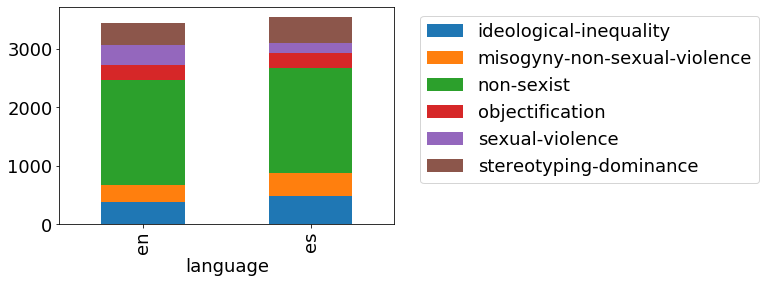

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots()
train.groupby(['language', 'task2']).size().unstack().plot(kind = 'bar', stacked = 'True', ax = ax, legend = False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [7]:
train_, dev = train_test_split(train, test_size=0.2, stratify=train['lang_task2']) 
train_.groupby(['task1', 'task2']).size()

task1       task2                       
non-sexist  non-sexist                      2880
sexist      ideological-inequality           693
            misogyny-non-sexual-violence     548
            objectification                  400
            sexual-violence                  413
            stereotyping-dominance           647
dtype: int64

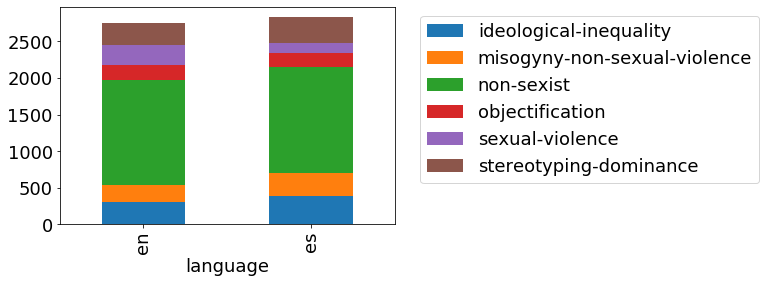

In [8]:
fig, ax = plt.subplots()
train_.groupby(['language', 'task2']).size().unstack().plot(kind = 'bar', stacked = 'True', ax = ax, legend = False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [9]:
dev.groupby(['task1', 'task2']).size()/len(dev)

task1       task2                       
non-sexist  non-sexist                      0.515759
sexist      ideological-inequality          0.123926
            misogyny-non-sexual-violence    0.098138
            objectification                 0.071633
            sexual-violence                 0.074499
            stereotyping-dominance          0.116046
dtype: float64

In [10]:
train_.groupby(['task1', 'task2']).size()/len(train_)

task1       task2                       
non-sexist  non-sexist                      0.516037
sexist      ideological-inequality          0.124171
            misogyny-non-sexual-violence    0.098190
            objectification                 0.071672
            sexual-violence                 0.074001
            stereotyping-dominance          0.115929
dtype: float64

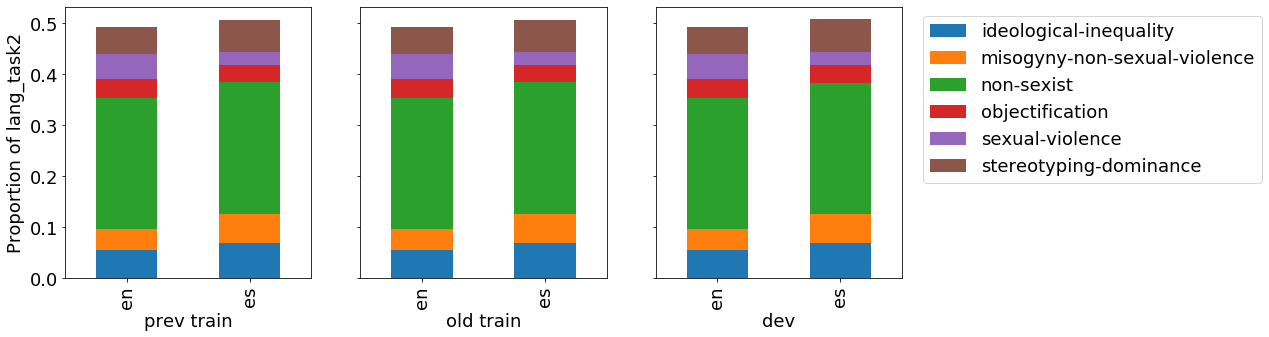

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5), sharey = True)
(train.groupby(['language', 'task2']).size()/len(train)).unstack().plot(kind = 'bar', stacked = 'True', ax = ax[0], legend = False)
(train_.groupby(['language', 'task2']).size()/len(train_)).unstack().plot(kind = 'bar', stacked = 'True', ax = ax[1], legend = False)
(dev.groupby(['language', 'task2']).size()/len(dev)).unstack().plot(kind = 'bar', stacked = 'True', ax = ax[2], legend = False)

ax[0].set_ylabel("Proportion of lang_task2")

for n, i in enumerate(['prev train', 'old train', 'dev']):
    ax[n].set_xlabel(i)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [12]:
train_.to_csv(DATA_ROOT+"training/EXIST2021_translated_new_training.tsv", sep = "\t", index = False)
dev.to_csv(DATA_ROOT+"training/EXIST2021_translated_new_dev.tsv", sep = "\t", index = False)